In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv3D, Conv2D, Conv1D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

Using TensorFlow backend.


In [3]:
from PIL import Image
import os
from pylab import *
import re
from PIL import Image, ImageChops, ImageEnhance

In [4]:
def get_imlist(path):
    return [os.path.join(path,f) for f in os.listdir(path) if f.endswith('.png') or f.endswith('.jpg') or f.endswith('.gif')]

In [5]:
def convert_to_ela_image(path, quality):
    filename = path
    resaved_filename = filename.split('.')[0] + '.resaved.jpg'
    ELA_filename = filename.split('.')[0] + '.ela.png'
    
    im = Image.open(filename).convert('RGB')
    im.save(resaved_filename, 'JPEG', quality=quality)
    resaved_im = Image.open(resaved_filename)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    print ("Maximum difference was %d" % (max_diff))
    
    return ela_im

In [6]:
fakes_datasets_filename = sorted(get_imlist('datasets/train/fake/'))
reals_datasets_filename = sorted(get_imlist('datasets/train/real'))

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/train/fake/'

# Starts Here

In [6]:
fake_imfile_list = []
for filename in fakes_datasets_filename[0:1000]:
    fake_imfile_list.append(array(Image.open(filename).convert('RGB').resize((128, 128))).flatten())

In [7]:
real_imfile_list = []
for filename in reals_datasets_filename[0:1000]:
    real_imfile_list.append(array(Image.open(filename).convert('RGB').resize((128, 128))).flatten())

In [8]:
len(fake_imfile_list)

1000

In [9]:
len(real_imfile_list)

1000

# Lanjut

In [10]:
for index, fake_imfile in enumerate(fake_imfile_list):
    fake_imfile_list[index] = fake_imfile / 255.0

In [11]:
for index, real_imfile in enumerate(real_imfile_list):
    real_imfile_list[index] = real_imfile / 255.0

# Change to Data Frame

## Extend and Delete

In [12]:
X = []
X.extend(fake_imfile_list)
X.extend(real_imfile_list)

In [13]:
len(X)

2000

In [14]:
X = pd.DataFrame(X)
X

,0,1,2,3,4,5,6,7,8,9,...,49142,49143,49144,49145,49146,49147,49148,49149,49150,49151
0,0.674510,0.745098,0.745098,0.701961,0.788235,0.780392,0.627451,0.725490,0.713725,0.505882,...,0.196078,0.443137,0.050980,0.200000,0.541176,0.113725,0.274510,0.584314,0.066667,0.258824
1,0.376471,0.498039,0.709804,0.380392,0.501961,0.713725,0.384314,0.505882,0.717647,0.380392,...,0.411765,0.003922,0.345098,0.411765,0.015686,0.356863,0.423529,0.007843,0.349020,0.415686
2,0.525490,0.537255,0.737255,0.380392,0.450980,0.709804,0.227451,0.309804,0.619608,0.290196,...,0.196078,0.345098,0.607843,0.407843,0.086275,0.352941,0.129412,0.121569,0.392157,0.137255
3,0.654902,0.733333,0.862745,0.654902,0.733333,0.862745,0.650980,0.729412,0.858824,0.654902,...,0.196078,0.345098,0.607843,0.407843,0.086275,0.352941,0.129412,0.121569,0.392157,0.137255
4,0.070588,0.062745,0.074510,0.058824,0.050980,0.054902,0.062745,0.058824,0.050980,0.035294,...,0.427451,0.682353,0.619608,0.556863,0.792157,0.729412,0.666667,0.760784,0.698039,0.635294
5,0.321569,0.427451,0.494118,0.317647,0.423529,0.490196,0.333333,0.439216,0.505882,0.345098,...,0.125490,0.058824,0.180392,0.109804,0.078431,0.200000,0.137255,0.078431,0.200000,0.141176
6,0.270588,0.447059,0.670588,0.270588,0.447059,0.670588,0.270588,0.447059,0.670588,0.266667,...,0.200000,0.223529,0.196078,0.133333,0.286275,0.235294,0.160784,0.360784,0.282353,0.176471
7,0.019608,0.019608,0.019608,0.003922,0.003922,0.003922,0.000000,0.000000,0.000000,0.003922,...,0.674510,0.694118,0.709804,0.721569,0.643137,0.658824,0.670588,0.619608,0.635294,0.647059
8,0.050980,0.062745,0.027451,0.007843,0.031373,0.000000,0.019608,0.050980,0.007843,0.011765,...,0.556863,0.380392,0.474510,0.521569,0.250980,0.325490,0.380392,0.301961,0.356863,0.400000
9,0.341176,0.007843,0.000000,0.337255,0.007843,0.000000,0.329412,0.011765,0.007843,0.345098,...,0.137255,0.137255,0.043137,0.094118,0.109804,0.047059,0.086275,0.062745,0.035294,0.062745


## Add Y

In [15]:
Y = []
for i in range(len(fake_imfile_list)):
    Y.append(1)
for i in range(len(real_imfile_list)):
    Y.append(0)

In [16]:
Y = to_categorical(Y, num_classes=2)

In [17]:
Y.shape

(2000, 2)

# Reshape X

In [18]:
X = X.values.reshape(-1, 128, 128, 3)

In [19]:
X.shape

(2000, 128, 128, 3)

## Train Test Split

In [20]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.1, random_state=5)

In [21]:
X_val

array([[[[0.81960784, 0.98431373, 0.68627451],
         [0.96078431, 0.98431373, 0.96862745],
         [0.99607843, 0.99215686, 0.97254902],
         ...,
         [0.18431373, 0.45098039, 0.0627451 ],
         [0.18431373, 0.45098039, 0.0627451 ],
         [0.17254902, 0.44705882, 0.05882353]],

        [[0.79215686, 0.97647059, 0.65882353],
         [0.91372549, 0.99215686, 0.94901961],
         [0.98823529, 0.99607843, 0.99215686],
         ...,
         [0.18431373, 0.45098039, 0.0627451 ],
         [0.18431373, 0.45098039, 0.0627451 ],
         [0.17254902, 0.44705882, 0.05882353]],

        [[0.51372549, 0.82352941, 0.01960784],
         [0.62745098, 0.8745098 , 0.18039216],
         [0.64313725, 0.84705882, 0.27843137],
         ...,
         [0.18039216, 0.45490196, 0.07058824],
         [0.17647059, 0.45098039, 0.06666667],
         [0.18039216, 0.44313725, 0.0627451 ]],

        ...,

        [[0.03529412, 0.22352941, 0.        ],
         [0.0745098 , 0.25098039, 0.        ]

# Model

In [9]:
model = Sequential()

model.add(Conv2D(filters = 30, kernel_size = (5, 5),padding = 'valid', 
                 activation ='relu', input_shape = (128,128,3), strides = 2))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters = 30, kernel_size = (5, 5),padding = 'valid', 
                 activation ='relu', strides = 2))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPool2D(pool_size=(2, 2), strides = 1))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'valid', 
                 activation ='relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'valid', 
                 activation = 'relu', strides = 2))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(MaxPool2D(pool_size=(2, 2), strides = 1))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'valid', 
                activation = 'relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'valid', 
                activation = 'relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'valid', 
                activation = 'relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)

model.add(Conv2D(filters = 16, kernel_size = (3, 3), padding = 'valid', 
                activation = 'relu'))
print("Input: ", model.input_shape)
print("Output: ", model.output_shape)
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(2, activation = "softmax"))
model.add(Dropout(0.5))

Input:  (None, 128, 128, 3)
Output:  (None, 62, 62, 30)
Input:  (None, 128, 128, 3)
Output:  (None, 29, 29, 30)
Input:  (None, 128, 128, 3)
Output:  (None, 28, 28, 30)
Input:  (None, 128, 128, 3)
Output:  (None, 26, 26, 16)
Input:  (None, 128, 128, 3)
Output:  (None, 12, 12, 16)
Input:  (None, 128, 128, 3)
Output:  (None, 11, 11, 16)
Input:  (None, 128, 128, 3)
Output:  (None, 9, 9, 16)
Input:  (None, 128, 128, 3)
Output:  (None, 7, 7, 16)
Input:  (None, 128, 128, 3)
Output:  (None, 5, 5, 16)
Input:  (None, 128, 128, 3)
Output:  (None, 3, 3, 16)


In [23]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)


In [24]:
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])


In [25]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)


In [26]:
epochs = 50
batch_size = 100

In [27]:
history = model.fit(X_train, Y_train, batch_size = batch_size, epochs = epochs, 
          validation_data = (X_val, Y_val), verbose = 2)

Train on 1800 samples, validate on 200 samples
Epoch 1/50
 - 2s - loss: 0.2440 - acc: 0.5033 - val_loss: 1.1921e-07 - val_acc: 0.4700
Epoch 2/50
 - 1s - loss: 1.1921e-07 - acc: 0.5033 - val_loss: 1.1921e-07 - val_acc: 0.4700
Epoch 3/50
 - 1s - loss: 1.1921e-07 - acc: 0.5033 - val_loss: 1.1921e-07 - val_acc: 0.4700
Epoch 4/50
 - 1s - loss: 1.1921e-07 - acc: 0.5033 - val_loss: 1.1921e-07 - val_acc: 0.4700
Epoch 5/50
 - 1s - loss: 1.1921e-07 - acc: 0.5033 - val_loss: 1.1921e-07 - val_acc: 0.4700
Epoch 6/50
 - 1s - loss: 1.1921e-07 - acc: 0.5033 - val_loss: 1.1921e-07 - val_acc: 0.4700
Epoch 7/50
 - 1s - loss: 1.1921e-07 - acc: 0.5033 - val_loss: 1.1921e-07 - val_acc: 0.4700
Epoch 8/50
 - 1s - loss: 1.1921e-07 - acc: 0.5033 - val_loss: 1.1921e-07 - val_acc: 0.4700
Epoch 9/50
 - 1s - loss: 1.1921e-07 - acc: 0.5033 - val_loss: 1.1921e-07 - val_acc: 0.4700
Epoch 10/50
 - 1s - loss: 1.1921e-07 - acc: 0.5033 - val_loss: 1.1921e-07 - val_acc: 0.4700
Epoch 11/50
 - 1s - loss: 1.1921e-07 - acc: 0.

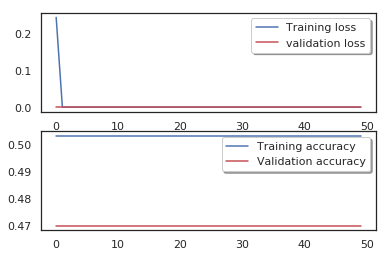

In [28]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

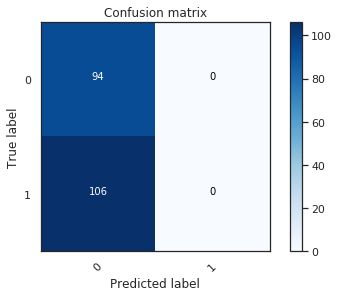

In [29]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2)) 
